In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Reading train data and plotting the data points.

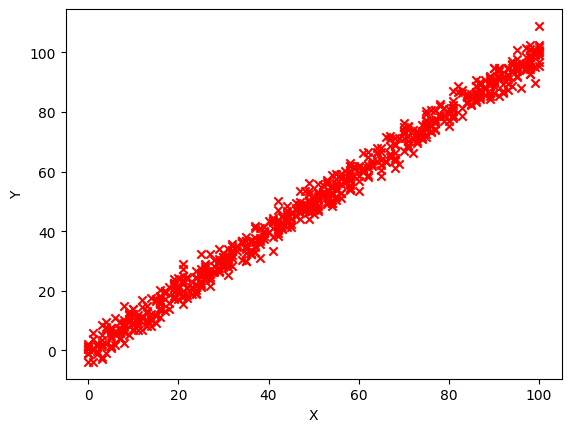

In [43]:
train_data = pd.read_csv("train.csv")
X_train = train_data['x'].to_numpy()
Y_train = train_data['y'].to_numpy()
plt.scatter(X_train, Y_train, c='r', marker='x')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Defining the cost function, and Gradient Descent algorithm.

In [74]:
def cost_func(x, y, w, b):
    """Computes the cost of the model F(w, b) for a choosen w and b

    Args:
        x (np.array): The inputs for the model
        y (np.array): The "Correct" outputs
        w (Number): w parameter
        b (Number): b parameter

    Returns:
        Number: The cost of the model.
    """
    m = len(x)
    s = 0
    for i in range(m):
        t = s
        f_wb = w*x[i] + b
        s = s + (f_wb - y[i])**2
    total_cost = s/2*m
    return total_cost

def compute_gradient(x, y, w, b):
    """Computes the gradient of cost function at w and b

    Args:
        x (np.array): Training inputs
        y (np.array): Training oupts (Correct answers)
        w (Number): w parameter
        b (Number): b parameter

    Returns:
        Number, Number: dj_dw and dj_db
    """
    m = len(x)
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w*x[i] + b
        er = (f_wb - y[i])
        dj_dw = dj_dw + er*x[i]
        dj_db = dj_db + er
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db

def GD_alorithm(x, y, alpha):
    """Calculates the best fit for the model f_w,b(X) = w*X + b for the given data and learning rate

    Args:
        x (np.array): Inputs of training data
        y (np.array): Correct key of output data
        alpha (Number): Learning Rate

    Returns:
        w, b, J_history: Parameters and Cost function history for Learning Curve
    """
    J_history = []
    w = 0
    b = 0
    prev_J = cost_func(x, y, w, b)
    iterations = 0
    while(True):
        iterations += 1
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        curr_J = cost_func(x, y, w, b)
        if(prev_J-curr_J < 10):
            J_history.append(curr_J)
        print(f"w: {w}, b: {b}, J: {curr_J}")
        if(curr_J > prev_J):
            print(f"The value of alpha: {alpha} is too large, try a smaller value.")
            break
        if(prev_J-curr_J < 0.001):
            return w, b, J_history, iterations
        
        prev_J = curr_J

Let's implement the Gradient Descent algorithm.

w: 0.9996502682140321, b: 0.014973482536851417, J: 1934535.58251598
w: 0.9987523622027801, b: 0.01494986111344891, J: 1933877.208944405
w: 0.9987533212773485, b: 0.014939713442557893, J: 1933877.0397876722
w: 0.9987534728246616, b: 0.014929554431904779, J: 1933876.8711875218
w: 0.9987536250859742, b: 0.014919396196069908, J: 1933876.7026127283
w: 0.9987537773351852, b: 0.014909238724112372, J: 1933876.5340632866
w: 0.9987539295729477, b: 0.014899082015984506, J: 1933876.3655391904
w: 0.9987540817992623, b: 0.014888926071628865, J: 1933876.197040444
w: 0.9987542340141297, b: 0.014878770890988012, J: 1933876.0285670334
w: 0.9987543862175505, b: 0.014868616474004516, J: 1933875.8601189621
w: 0.998754538409526, b: 0.01485846282062095, J: 1933875.6916962229
w: 0.9987546905900567, b: 0.014848309930779895, J: 1933875.523298815
w: 0.9987548427591437, b: 0.014838157804423931, J: 1933875.3549267307
w: 0.9987549949167878, b: 0.014828006441495647, J: 1933875.18657997
w: 0.9987551470629897, b: 0.01

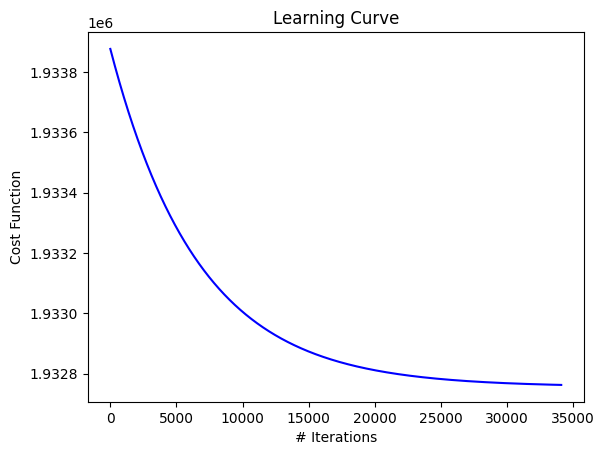

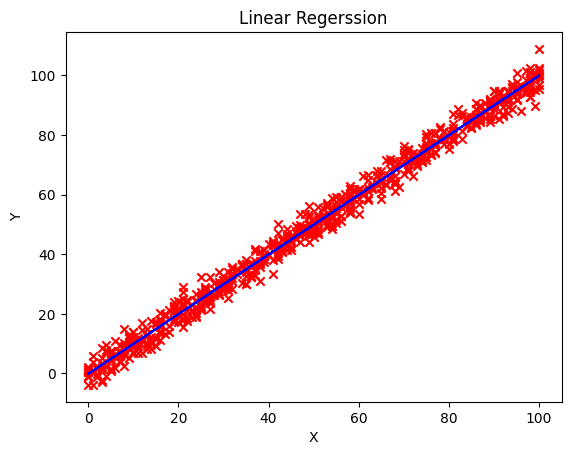

In [75]:
alpha = 0.0003
w, b, J_history, iterations = GD_alorithm(X_train, Y_train, alpha)

# Plotting Learning Curve
s = len(J_history)
indices = []
for i in range(1, s+1):
    indices.append(i+iterations-s)
plt.plot(indices, J_history, c='b')
plt.xlabel("# Iterations")
plt.ylabel("Cost Function")
plt.title("Learning Curve")
plt.show()

def predict(x):
    Y_pred = []   
    m = len(x)
    
    for i in range(m):
        Y_pred.append(w*x[i]+b)
        
    return Y_pred

Y_pred = predict(X_train)

plt.plot(X_train, Y_pred, c='b')
plt.scatter(X_train, Y_train, c='r', marker='x')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regerssion")
plt.show()